## Modelos  Predicción de datos de Series Temporales.

## Trafico de Madrid. Zona entre M30 y M40.
### (12 estaciones de aforo)

In [1]:
## realizamos predicción a la suma de los 12 aforos diarios permanentes en la zona.
## el indice que nos da en un dato de la MOVILIDAD del trafico de Madrid.
## día a día.

## Modelo 1. Exponential Smoothing.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
# buscamos el archivo con los datos y indexamos la fecha.
df = pd.read_csv('TrafMadridM30M40.csv')
df['FDIA']=pd.to_datetime(df['FDIA'])
df.set_index('FDIA',inplace=True)
df.head()

,ID
FDIA,
2020-01-01,390716.0
2020-01-02,638514.0
2020-01-03,592706.0
2020-01-04,457556.0
2020-01-05,406504.0


In [4]:
df.index.freq = 'D'
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2021-07-22', '2021-07-23', '2021-07-24', '2021-07-25',
               '2021-07-26', '2021-07-27', '2021-07-28', '2021-07-29',
               '2021-07-30', '2021-07-31'],
              dtype='datetime64[ns]', name='FDIA', length=578, freq='D')

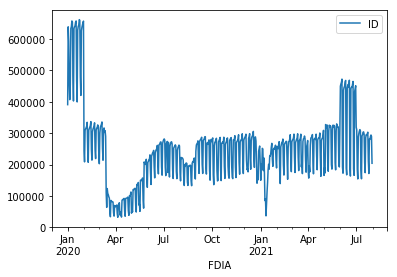

In [5]:
df.plot();

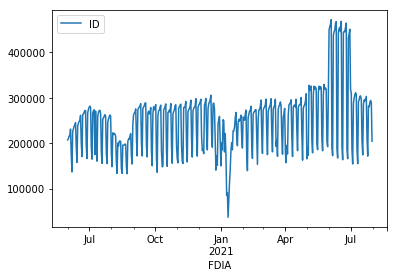

In [6]:
# para una predicción del mes siguiente al último que tenemos,
# no utilizamos los datos antes del 01/06/2021.
df1 = df.iloc[152:]
df1.plot();

In [8]:
len(df1)

426

In [9]:
train = df1.iloc[:395] 
test = df1.iloc[395:]
# el test en con los datos del mes de julio (31 días).

In [10]:
# generamos el modelo.

from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train['ID'],trend='add',seasonal='add', seasonal_periods=7).fit()

test_predictions = fitted_model.forecast(31)
test_predictions

2021-07-01    443220.061048
2021-07-02    446255.001762
2021-07-03    187032.228850
2021-07-04    180208.624278
2021-07-05    442778.971722
2021-07-06    452974.515054
2021-07-07    451493.786592
2021-07-08    450163.810257
2021-07-09    453198.750971
2021-07-10    193975.978059
2021-07-11    187152.373487
2021-07-12    449722.720931
2021-07-13    459918.264263
2021-07-14    458437.535801
2021-07-15    457107.559466
2021-07-16    460142.500180
2021-07-17    200919.727268
2021-07-18    194096.122696
2021-07-19    456666.470140
2021-07-20    466862.013472
2021-07-21    465381.285010
2021-07-22    464051.308675
2021-07-23    467086.249389
2021-07-24    207863.476477
2021-07-25    201039.871905
2021-07-26    463610.219349
2021-07-27    473805.762681
2021-07-28    472325.034219
2021-07-29    470995.057884
2021-07-30    474029.998598
2021-07-31    214807.225686
Freq: D, dtype: float64

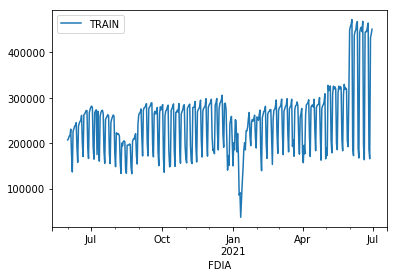

In [11]:
# pintamos los resultados en varias graficas para ver la previsión mejor.
train['ID'].plot(legend=True,label='TRAIN')

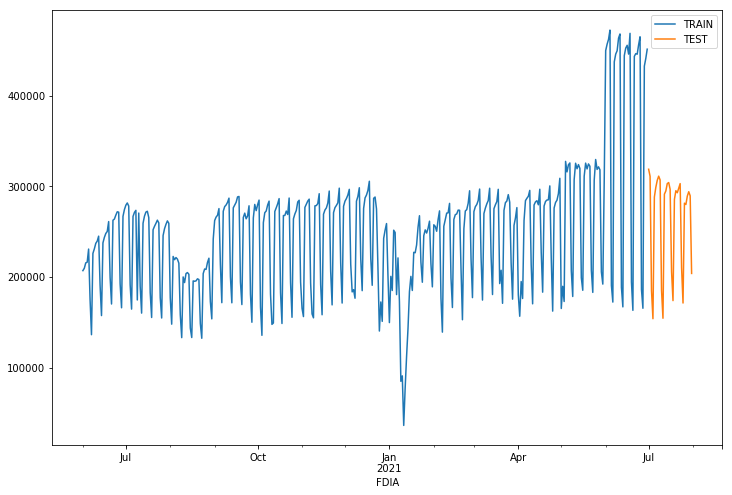

In [12]:
train['ID'].plot(legend=True,label='TRAIN',figsize=(12,8))
test['ID'].plot(legend=True,label='TEST')

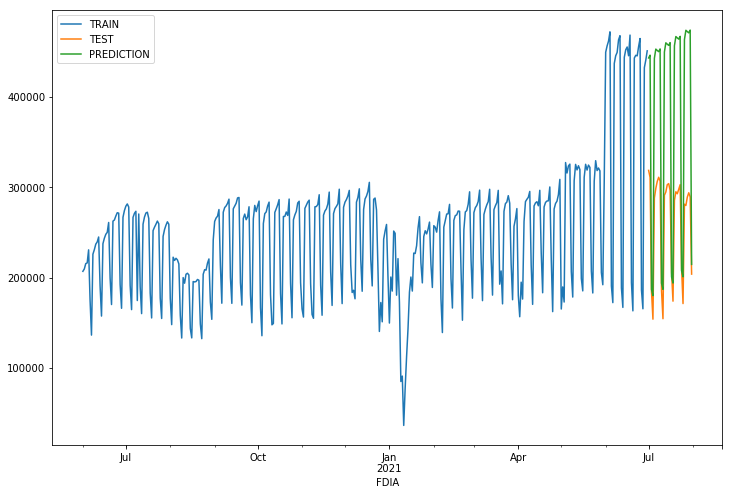

In [13]:
train['ID'].plot(legend=True,label='TRAIN',figsize=(12,8))
test['ID'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION');

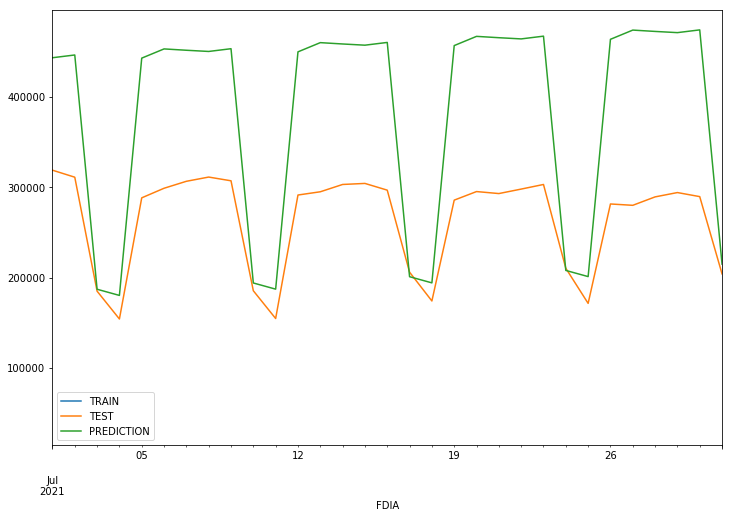

In [14]:
# pintamos los datos de predicción en el mes de julio.
train['ID'].plot(legend=True,label='TRAIN')
test['ID'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2021-07-01','2021-07-31']);

In [15]:
# evaluamos la métrica de los resultados.
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(test['ID'],test_predictions)

119268.51931232512

In [16]:
test['ID'].describe()

count        31.000000
mean     264027.225806
std       54608.475297
min      154135.000000
25%      208103.000000
50%      291305.000000
75%      300879.000000
max      318778.000000
Name: ID, dtype: float64

In [17]:
np.sqrt(mean_squared_error(test['ID'],test_predictions))

137456.27840294287

In [18]:
# error sqrt. respecto a la media del valor de los datos.
137456*100/264027

52.061342211213244

In [19]:
# el error en la predicción del test es del 52%, es muy alto para el tipo
# de datos que manejamos.
# la verdad que el problema del COVID y la estacionalidad de verano hace que
# sea dificil las series de predicción de tráfico este año.
# se ve como la predicción sigue los valores de junio que subieron mucho en proporcion a los meses anteriores.


In [20]:
# predecimos los datos con este modelo para agosto. con este error.

fitted_pred31 = ExponentialSmoothing(df1['ID'],trend='add',seasonal='add', seasonal_periods=7).fit()

pred31 = fitted_pred31.forecast(31)
pred31

2021-08-01    140701.856526
2021-08-02    267133.720774
2021-08-03    280769.463331
2021-08-04    297019.425833
2021-08-05    302807.869649
2021-08-06    304881.192117
2021-08-07    191824.379187
2021-08-08    143760.781411
2021-08-09    270192.645659
2021-08-10    283828.388216
2021-08-11    300078.350718
2021-08-12    305866.794534
2021-08-13    307940.117002
2021-08-14    194883.304072
2021-08-15    146819.706296
2021-08-16    273251.570544
2021-08-17    286887.313101
2021-08-18    303137.275603
2021-08-19    308925.719419
2021-08-20    310999.041887
2021-08-21    197942.228957
2021-08-22    149878.631181
2021-08-23    276310.495429
2021-08-24    289946.237986
2021-08-25    306196.200488
2021-08-26    311984.644304
2021-08-27    314057.966772
2021-08-28    201001.153842
2021-08-29    152937.556066
2021-08-30    279369.420314
2021-08-31    293005.162871
Freq: D, dtype: float64

In [21]:
# guardamos los datos de predicción de trafico en el mes de agosto.modelo 1.

pred31.to_csv('Pred08Mod1trafMadridM30M40.csv')

## Modelo 2. SARIMAX

In [7]:
# al tener modelos más complejos, retiramos los avisos warnings.
import warnings
warnings.filterwarnings("ignore")

In [8]:
# los datos ya los tenemos en 'df', y del mismo modo trabajamos con 'df1'
# datos desde el 01/06/2020 (asi no influye la bajada de trafico del periodo de
# alarma de covid en marzo-abril-mayo de 2020)

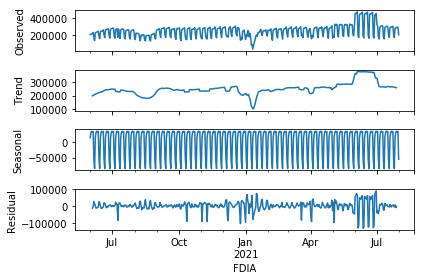

In [9]:
# representamos la descomposición estacional.
from statsmodels.tsa.seasonal import seasonal_decompose 

result = seasonal_decompose(df1['ID'])
result.plot();

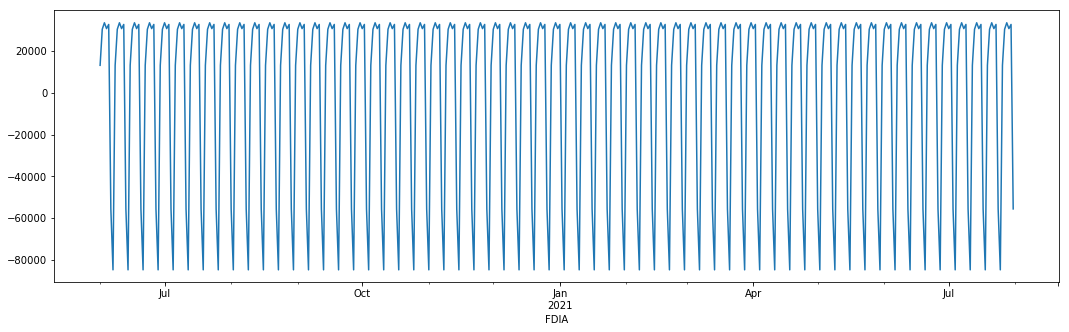

In [10]:
# puede que haya estacinalidad a nivel semanal.
result.seasonal.plot(figsize=(18,5));

In [11]:
len(df1)

426

In [12]:
# vamos a pronosticar los datos de julio2021. 31 días.
# realizamos los archivos de 'train' y 'test', este último es el mes de junio.
# retiramos datos antes de mayo2021, para que no influya los datos del covid.
train = df1.iloc[:395]
test = df1.iloc[395:]

In [13]:
# 1º pronostico. Modelo SARIMA. Obtenemos valores del modelo.
from pmdarima import auto_arima 

auto_arima(df1['ID'],seasonal=True,m=7).summary()

C:\Users\ahija\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 0, 1, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\ahija\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 2) seasonal_order=(2, 0, 1, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\ahija\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 2) seasonal_order=(1, 0, 1, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  426
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -5129.202
Date:                           Sun, 12 Sep 2021   AIC                          10272.405
Time:                                   13:32:07   BIC                          10300.769
Sample:                                        0   HQIC                         10283.610
                                           - 426                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     79.9999    310.746      0.257      0.797    -529.050     689.050
ar.L1          0.5046      0.144      3.507      0.000       0.223       0.787
ar.L2         -0.0167      0.152     -0.110      0.912      -0.314       0.280
ma.L1         -0.8931      0.090     -9.898      0.000      -1.070      -0.716
ar.S.L7        0.9189      0.061     15.113      0.000       0.800       1.038
ma.S.L7       -0.4801      0.147     -3.262      0.001      -0.769      -0.192
sigma2       3.52e+09   6.06e-05   5.81e+13      0.000    3.52e+09    3.52e+09
===================================================================================
Ljung-Box (Q):                       33.71   Jarque-Bera (JB):               415.75
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               3.43   Skew:                            -0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.53e+29. Standard errors may be unstable.
"""

In [14]:
# ahora generamos nuestro modelo utilizando los indicadores de SARIMAX.

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['ID'],order=(2,1,1),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                ID   No. Observations:                  395
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -4750.237
Date:                           Sun, 12 Sep 2021   AIC                           9512.475
Time:                                   13:32:16   BIC                           9536.333
Sample:                               06-01-2020   HQIC                          9521.928
                                    - 06-30-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5525      0.129      4.279      0.000       0.299       0.806
ar.L2          0.0871      0.170      0.511      0.609      -0.247       0.421
ma.L1         -0.9902      0.034    -29.080      0.000      -1.057      -0.923
ar.S.L7        0.9511      0.052     18.409      0.000       0.850       1.052
ma.S.L7       -0.4854      0.138     -3.514      0.000      -0.756      -0.215
sigma2       3.48e+09   1.05e-11   3.32e+20      0.000    3.48e+09    3.48e+09
===================================================================================
Ljung-Box (Q):                       37.10   Jarque-Bera (JB):               548.36
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               3.80   Skew:                            -0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.59e+36. Standard errors may be unstable.
"""

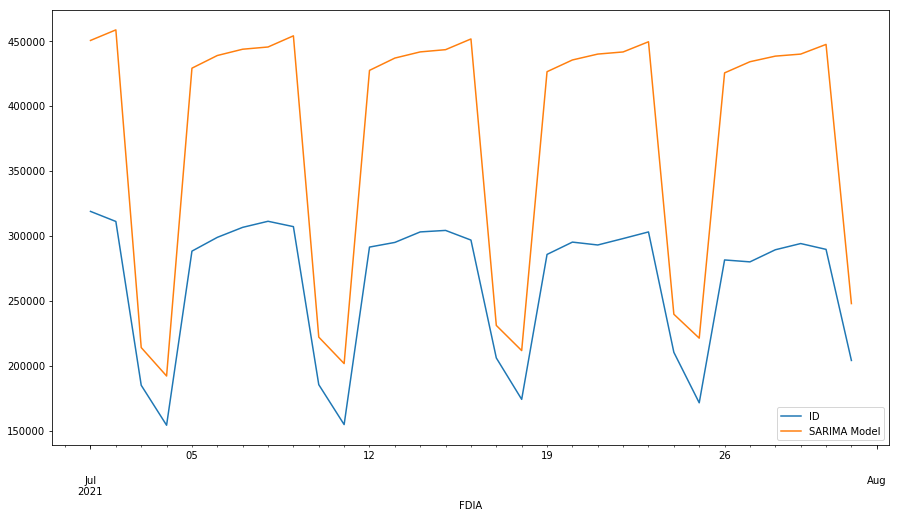

In [15]:
# predecimos los valores (últimos 31 dias, corresponde a datos de juLio)
start=len(train)
end=len(train)+len(test)-1

predictions = results.predict(start,end).rename('SARIMA Model')

# y lo pintamos junto a los datos reales del 'test'
test['ID'].plot(legend=True,figsize=(15,8))
predictions.plot(legend=True)

In [16]:
# evaluo las métricas de los resultados
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(test['ID'],predictions)

112701.5790147195

In [17]:
test['ID'].describe()

count        31.000000
mean     264027.225806
std       54608.475297
min      154135.000000
25%      208103.000000
50%      291305.000000
75%      300879.000000
max      318778.000000
Name: ID, dtype: float64

In [18]:
np.sqrt(mean_squared_error(test['ID'],predictions))

122777.20113778047

In [19]:
# error sqrt.
122777*100/264027

46.50168353994099

In [20]:
# el error en la predicción del test es del 46,5%, sigue estando alto.
# la verdad que el problema del COVID y la estacionalidad de verano hace que
# sea dificil las series de predicción de tráfico este año.

# vamos a seguir estudiando otros modelos y elegimos aquel que nos de mejor
# predicción en el test, para realizar la PREDICCIÓN del MES siguiente: AGOSTO.

In [21]:
# predecimos los datos con este modelo para agosto. modelo 2.
dias= 31

model2 = SARIMAX(df1['ID'],order=(2,1,1),seasonal_order=(2,0,1,7),enforce_invertibility=False)
predic2 = model2.fit()
start=len(df1)
end=len(df1)+dias-1

predicmodel2 = predic2.predict(start,end).rename('SARIMA Model')
predicmodel2


2021-08-01    176099.182107
2021-08-02    296419.909466
2021-08-03    305029.520733
2021-08-04    312006.605785
2021-08-05    311905.650458
2021-08-06    310598.862659
2021-08-07    211654.861035
2021-08-08    186351.478002
2021-08-09    307188.762598
2021-08-10    318351.773093
2021-08-11    323322.319367
2021-08-12    320582.621725
2021-08-13    320146.447164
2021-08-14    216634.140597
2021-08-15    192491.793122
2021-08-16    311974.785384
2021-08-17    323954.643002
2021-08-18    327992.042961
2021-08-19    324173.257695
2021-08-20    324069.415739
2021-08-21    219910.703864
2021-08-22    196514.346501
2021-08-23    314022.576576
2021-08-24    326186.893832
2021-08-25    329793.749081
2021-08-26    325579.456489
2021-08-27    325610.245228
2021-08-28    222422.762273
2021-08-29    199606.128537
2021-08-30    314918.442794
2021-08-31    327013.151178
Freq: D, Name: SARIMA Model, dtype: float64

In [22]:
# guardamos los datos de predicción de trafico en el mes de agosto.modelo 2.

predicmodel2.to_csv('Pred08Mod2trafMadridM30M40.csv')

## Modelo 3. RNN

In [7]:
# uso de redes neuronales para predecir datos de una serie temporal

# ya tengo la base de datos 'df', reducida a 'df1' para el trabajo.
df1.head()

,ID
FDIA,
2020-06-01,207085.0
2020-06-02,209715.0
2020-06-03,215625.0
2020-06-04,216372.0
2020-06-05,230856.0


In [8]:
# definimos nuestros paquetes de datos de entrenamiento y test.
# realmente ya los tenemos definidos de los modelos anteriores, pero por si acaso.
len(df1)

426

In [9]:
# tomamos 31 dias de test (7,3% de los datos)
train = df1.iloc[:395]
test = df1.iloc[395:]
test

,ID
FDIA,
2021-07-01,318778.0
2021-07-02,311023.0
2021-07-03,184900.0
2021-07-04,154135.0
2021-07-05,288185.0
2021-07-06,298787.0
2021-07-07,306492.0
2021-07-08,311171.0
2021-07-09,307043.0


In [10]:
# normalizamos los datos entre 0 y 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [11]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [12]:
# ahora generamos el modelo con RNN
from keras.preprocessing.sequence import TimeseriesGenerator
scaled_test

array([[0.64799104],
       [0.63018486],
       [0.3405951 ],
       [0.26995589],
       [0.57774676],
       [0.6020899 ],
       [0.61978127],
       [0.63052468],
       [0.62104642],
       [0.34168804],
       [0.27112001],
       [0.58491056],
       [0.59314433],
       [0.61171741],
       [0.6143648 ],
       [0.59728648],
       [0.38890024],
       [0.31571467],
       [0.5719055 ],
       [0.5936908 ],
       [0.58860956],
       [0.59998439],
       [0.61169674],
       [0.39884231],
       [0.30960937],
       [0.5621563 ],
       [0.55875579],
       [0.58014847],
       [0.59115362],
       [0.58085107],
       [0.3844619 ]])

In [13]:
# creamos el modelo.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [14]:
# definimos el modelo RNN, con la estacionalidad semanal.
n_input = 7
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               91200     
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit_generator(generator,epochs=25)

C:\Users\ahija\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
388/388 [==============================] - 2s 3ms/step - loss: 0.0271
Epoch 2/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0170
Epoch 3/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0117
Epoch 4/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0118
Epoch 5/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0091
Epoch 6/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0089
Epoch 7/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0088
Epoch 8/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0081
Epoch 9/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0085
Epoch 10/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0086
Epoch 11/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0087
Epoch 12/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0082
Epoch 13/25
388/388 [====

In [17]:
model.history.history.keys()

dict_keys(['loss'])

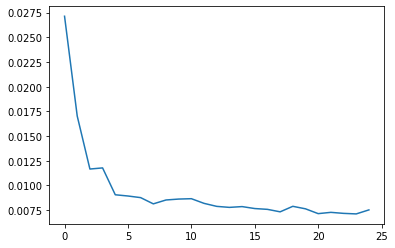

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(len(model.history.history['loss'])),model.history.history['loss'])

In [19]:
# vemos que el error de predicción baja hasta 0

In [20]:
# hacemos ahora la predicción usando el modelo RNN
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    
    # y volvemos a ejecutar

In [21]:
# ahora tengo mis datos de test_predictions
test_predictions

[array([1.0065837], dtype=float32),
 array([0.95735323], dtype=float32),
 array([0.50125134], dtype=float32),
 array([0.37132367], dtype=float32),
 array([0.8731509], dtype=float32),
 array([0.99764544], dtype=float32),
 array([0.96738243], dtype=float32),
 array([1.0185142], dtype=float32),
 array([0.9709831], dtype=float32),
 array([0.6219082], dtype=float32),
 array([0.43624938], dtype=float32),
 array([0.84116524], dtype=float32),
 array([1.033419], dtype=float32),
 array([0.98904353], dtype=float32),
 array([1.0216131], dtype=float32),
 array([0.9885779], dtype=float32),
 array([0.7349128], dtype=float32),
 array([0.5137261], dtype=float32),
 array([0.8247397], dtype=float32),
 array([1.0456944], dtype=float32),
 array([1.0047171], dtype=float32),
 array([1.0270572], dtype=float32),
 array([1.0017656], dtype=float32),
 array([0.83717], dtype=float32),
 array([0.6126547], dtype=float32),
 array([0.826827], dtype=float32),
 array([1.0489458], dtype=float32),
 array([1.015749], dtype

In [22]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[474953.34870005],
       [453512.35265815],
       [254869.48731267],
       [198283.00087097],
       [416840.29293364],
       [471060.53397101],
       [457880.2985096 ],
       [480149.34091234],
       [459448.46744221],
       [307418.31970406],
       [226559.63669765],
       [402909.81081492],
       [486640.74880898],
       [467314.20697206],
       [481499.01131153],
       [467111.41375083],
       [356634.43292981],
       [260302.5388819 ],
       [395756.10600924],
       [491986.94091606],
       [474140.41058993],
       [483870.02022791],
       [472854.96323597],
       [401169.79201996],
       [303388.20679951],
       [396665.17101365],
       [493403.01493275],
       [478945.04199791],
       [486026.81387782],
       [477699.72755742],
       [436895.43146032]])

In [23]:
test['predictions'] = true_predictions

<ipython-input-23-fa6c3af7c69f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


In [24]:
test

,ID,predictions
FDIA,,
2021-07-01,318778.0,474953.348700
2021-07-02,311023.0,453512.352658
2021-07-03,184900.0,254869.487313
2021-07-04,154135.0,198283.000871
2021-07-05,288185.0,416840.292934
2021-07-06,298787.0,471060.533971
2021-07-07,306492.0,457880.298510
2021-07-08,311171.0,480149.340912
2021-07-09,307043.0,459448.467442


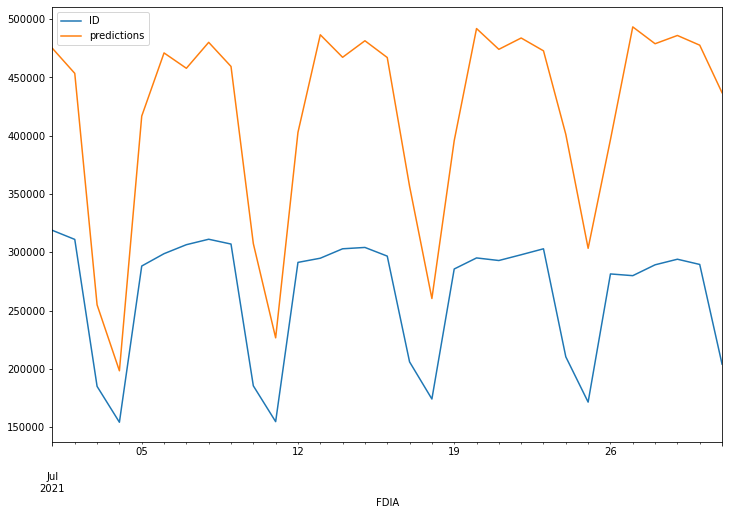

In [25]:
test.plot(figsize=(12,8))

In [26]:
# evaluo las métricas de los resultados
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(test['ID'],test['predictions'])

152624.02851035033

In [27]:
test['ID'].describe()

count        31.000000
mean     264027.225806
std       54608.475297
min      154135.000000
25%      208103.000000
50%      291305.000000
75%      300879.000000
max      318778.000000
Name: ID, dtype: float64

In [28]:
np.sqrt(mean_squared_error(test['ID'],test['predictions']))

158807.66495542

In [29]:
# error sqrt.
158807.7*100/264027.2

60.14823472733113

In [36]:
# en este caso el error de predicción es mayor, hasta un 60,1% de error.

## Modelo 4. Facebook's Prophet

In [30]:
# Usamos la bibliote de predicciones de la libreria de Facebook.
# diseñada para conjunto de datos comerciales comunes en Facebook.

In [41]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [42]:
# realizamos la carga del archivo
df = pd.read_csv('TrafMadridM30M40.csv')

In [43]:
# cambiamos la columna de FDIA al formato datatime y lo pasamos a indice, 
df.columns = ['ds','y']
df['ds']=pd.to_datetime(df['ds'])

In [44]:
df1 = df.iloc[152:]
df1.head()

,ds,y
152,2020-06-01,207085.0
153,2020-06-02,209715.0
154,2020-06-03,215625.0
155,2020-06-04,216372.0
156,2020-06-05,230856.0


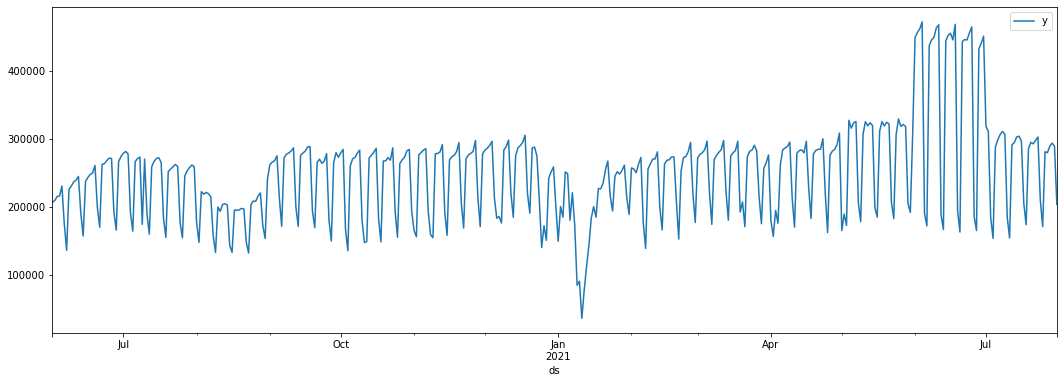

In [45]:
df1.plot(x='ds',y='y',figsize=(18,6))

In [46]:
len(df1)

426

In [47]:
train = df1.iloc[:395]
test = df1.iloc[395:]

In [48]:
# genero el modelo de predicción
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=31,freq='D')
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
421,2021-07-27,389073.791724,365278.392713,470319.059039,387833.452107,390397.627854,29734.372771,29734.372771,29734.372771,29734.372771,29734.372771,29734.372771,0.0,0.0,0.0,418808.164494
422,2021-07-28,390246.367903,367268.649966,475792.428633,388938.559904,391651.571772,32440.109346,32440.109346,32440.109346,32440.109346,32440.109346,32440.109346,0.0,0.0,0.0,422686.477249
423,2021-07-29,391418.944083,367261.253292,477796.835048,390022.969526,392907.626864,30560.900762,30560.900762,30560.900762,30560.900762,30560.900762,30560.900762,0.0,0.0,0.0,421979.844845
424,2021-07-30,392591.520263,372167.026197,479089.611970,391116.255480,394146.635279,32793.210065,32793.210065,32793.210065,32793.210065,32793.210065,32793.210065,0.0,0.0,0.0,425384.730327
425,2021-07-31,393764.096442,285873.776809,394119.663945,392204.299959,395395.201305,-54300.880724,-54300.880724,-54300.880724,-54300.880724,-54300.880724,-54300.880724,0.0,0.0,0.0,339463.215718


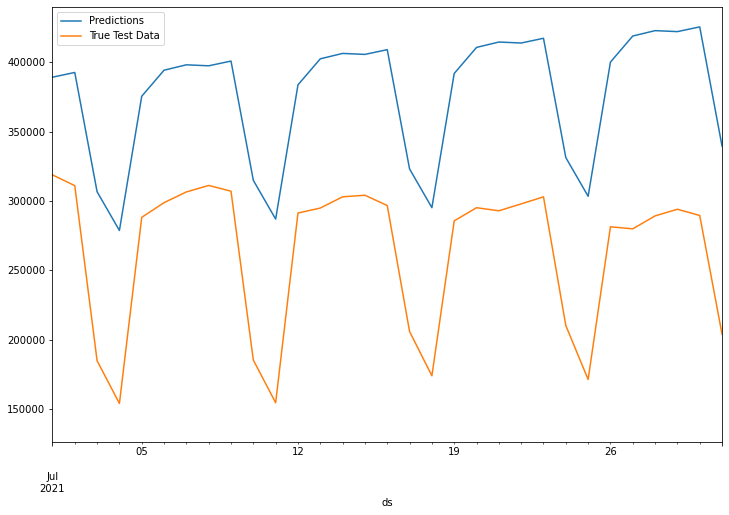

In [50]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Test Data',legend=True,ax=ax,xlim=('2021-07-01','2021-07-31'))

In [51]:
# evaluamos la predicción
from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-31:]['yhat']
predictions

395    389147.711815
396    392552.597297
397    306631.082688
398    278747.610160
399    375406.332985
400    394184.064722
401    398062.377477
402    397355.745073
403    400760.630555
404    314839.115946
405    286955.643417
406    383614.366242
407    402392.097980
408    406270.410734
409    405563.778330
410    408968.663812
411    323047.149203
412    295163.676675
413    391822.399500
414    410600.131237
415    414478.443991
416    413771.811588
417    417176.697070
418    331255.182460
419    303371.709932
420    400030.432757
421    418808.164494
422    422686.477249
423    421979.844845
424    425384.730327
425    339463.215718
Name: yhat, dtype: float64

In [52]:
test['y']

547    318778.0
548    311023.0
549    184900.0
550    154135.0
551    288185.0
552    298787.0
553    306492.0
554    311171.0
555    307043.0
556    185376.0
557    154642.0
558    291305.0
559    294891.0
560    302980.0
561    304133.0
562    296695.0
563    205938.0
564    174064.0
565    285641.0
566    295129.0
567    292916.0
568    297870.0
569    302971.0
570    210268.0
571    171405.0
572    281395.0
573    279914.0
574    289231.0
575    294024.0
576    289537.0
577    204005.0
Name: y, dtype: float64

In [53]:
rmse(predictions,test['y'])

113848.29165062378

In [54]:
test.mean()

y    264027.225806
dtype: float64

In [55]:
# % de error sobre la media (comparación valores)
113848*100/264027

43.1198324413791

In [56]:
# la predicción del error es del 43,1%, es un valor alto pero lo guardamos.
# en este grupo de datos, se ve que la influencia del salto de valores en el
# mes de julio, y la bajada en el ultimo mes de datos en junio no se adivina.
# aún así guardamos los datos para representarlos.

## Predicción de datos de Agosto con Modelo 4. Prophet.

In [57]:
# calculo de predicción con este modelo.
m = Prophet()
m.fit(df1)
future_ago = m.make_future_dataframe(periods=31,freq='D')
forecast_ago = m.predict(future_ago)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [58]:
predictions_ago = forecast_ago.iloc[-31:]['yhat']
predictions_ago

426    230591.519212
427    328431.189778
428    345783.860942
429    349222.104025
430    347060.830661
431    349317.563702
432    261427.542302
433    233546.728700
434    331386.399265
435    348739.070429
436    352177.313513
437    350016.040149
438    352272.773190
439    264382.751790
440    236501.938187
441    334341.608753
442    351694.279917
443    355132.523001
444    352971.249637
445    355227.982677
446    267337.961278
447    239457.147675
448    337296.818241
449    354649.489405
450    358087.732489
451    355926.459124
452    358183.192165
453    270293.170765
454    242412.357163
455    340252.027729
456    357604.698892
Name: yhat, dtype: float64

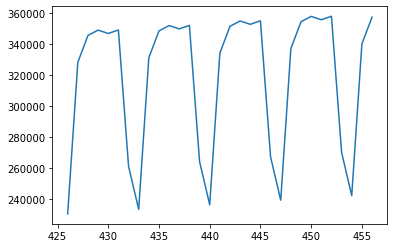

In [59]:
# representamos los valores de la predicción:
predictions_ago.plot()

In [60]:
# guardamos los datos de predicción de trafico en el mes de agosto.

predictions_ago.to_csv('Pred08Mod4trafMadridM30M40.csv')

In [61]:
# trabajo terminado. Hemos utilizado 4 modelos y guardado 3 archivos para 
# visualizarlos despues y elegir el mejor para el uso de los datos predichos
# para el mes de agosto 2031.

In [62]:
# Trabajo de Mariano Ahijado García. TFM VIU. Master Big Data 2020-21.